In [25]:
import json
import os
import glob
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import random
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

In [2]:
import platform

# print machine name
machine_name = platform.node().split(".")[0]
print(machine_name)

# print available scratch directories
print(" ".join(os.listdir(f"/{machine_name}")))

DISK_IO_DIR = "/{}/scr1/yiweil".format(machine_name)
print(DISK_IO_DIR)
if not os.path.exists(DISK_IO_DIR):
    os.mkdir(DISK_IO_DIR)

jagupard13
scr1 scr0 scr2 scr3
/jagupard13/scr1/yiweil


# Is contentiousness correlated w/ virality for Reddit posts?

Ways of measuring contentiousness:
- percentage of disagreeing comments (according to Zhang et al.-trained BERT)
- percentage of 

Ways of measuring virality:
- num likes
- upvotes


In [8]:
INT2LABEL = {
    0: "agreement",
    1: "disagreement",
    2: "other"
}

## r/changemyview

In [67]:
# # For each comment, label as agreeing or disagreeing
# comment_labels_df = pd.read_csv(os.path.join(DISK_IO_DIR,'cmv_comments_with_predictions.csv'),sep=',',header=0)
# comments_df = pd.read_csv('/u/scr/yiweil/Green-American-Lexicon/1_data_collection/reddit/\
# comments_output/changemyview/from_posts_1-1-2010_to_9-22-2021.csv',sep=',')
# comment_id2parent_id = dict(zip(comments_df['id'],comments_df['parent_id']))

# Iterate over comments w/ labels
# Increment counter of parent post's num agreeing and disagreeing comments
post_id2agreement = defaultdict(lambda: defaultdict(int))
parent_ids = []
for ix,row in comment_labels_df.iterrows():
    c_id = row['id']
    comment_label =  INT2LABEL[row['three_class_predicted']]
    parent_post_id = comment_id2parent_id[c_id].split('_')[-1]
    parent_ids.append(parent_post_id)
    post_id2agreement[parent_post_id][comment_label] += 1

posts_df = pd.read_csv('/u/scr/yiweil/Green-American-Lexicon/1_data_collection/reddit/\
pmaw_output/submissions/changemyview/1-1-2010_to_09-22-2021.csv',index_col=0)
# Then get percentages for each post
posts_df['n_agree_comments'] = posts_df['id'].apply(lambda x: post_id2agreement[x]['agreement']
                                                   if x in post_id2agreement else None)
posts_df['n_disagree_comments'] = posts_df['id'].apply(lambda x: post_id2agreement[x]['disagreement']
                                                      if x in post_id2agreement else None)
posts_df['pct_agree_comments'] = posts_df.apply(lambda x: x['n_agree_comments']/(x['num_comments'])
                                                if x['n_agree_comments'] > 0 and x['num_comments'] > 0
                                                else None,axis=1)
posts_df['pct_disagree_comments'] = posts_df.apply(lambda x: x['n_disagree_comments']/(x['num_comments'])
                                                   if x['n_disagree_comments'] > 0 and x['num_comments'] > 0
                                                else None,axis=1)

# Plotting/correlation testing

In [81]:
posts_df.loc[posts_df['n_disagree_comments'] > posts_df['num_comments']]

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,created_utc,domain,edited,full_link,gilded,...,removed_by,media_metadata,is_created_from_ads_ui,author_is_blocked,awarded_delta,delta_history,n_agree_comments,n_disagree_comments,pct_agree_comments,pct_disagree_comments
3910,Swimming_Inflation87,NaN,NaN,NaN,t2_9rxsh25g,1611630600,self.changemyview,NaN,https://www.reddit.com/r/changemyview/comments...,NaN,...,NaN,NaN,NaN,NaN,False,False,0.0,7.0,NaN,3.5


In [84]:
posts_df.loc[3910]['num_comments']

2

In [86]:
posts_df.loc[3910]['permalink']

'/r/changemyview/comments/l54ss1/cmv_mass_immigration_is_contributing_to_global/'

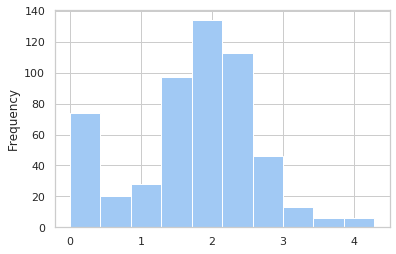

In [71]:
posts_df['n_disagree_comments'].apply(lambda x: math.log(x+1)).plot.hist()

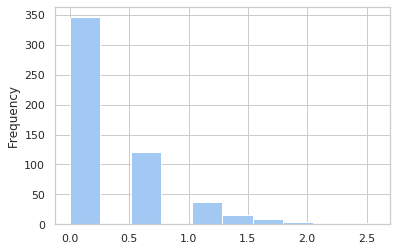

In [72]:
posts_df['n_agree_comments'].apply(lambda x: math.log(x+1)).plot.hist()

In [73]:
posts_df['pct_disagree_comments'].describe() # ?????

count    463.000000
mean       0.209095
std        0.210380
min        0.019202
25%        0.107143
50%        0.159574
75%        0.266968
max        3.500000
Name: pct_disagree_comments, dtype: float64

In [74]:
posts_df['pct_agree_comments'].describe()

count    191.000000
mean       0.033400
std        0.027677
min        0.003614
25%        0.015268
50%        0.026316
75%        0.041667
max        0.250000
Name: pct_agree_comments, dtype: float64

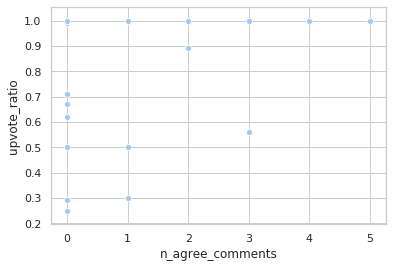

In [75]:
sns.scatterplot(data=posts_df,x='n_agree_comments',y='upvote_ratio')

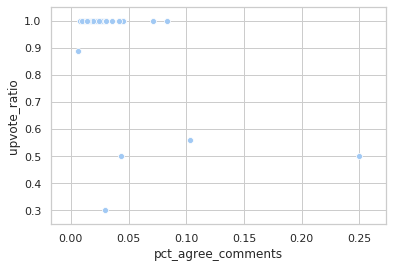

In [76]:
sns.scatterplot(data=posts_df,x='pct_agree_comments',y='upvote_ratio')

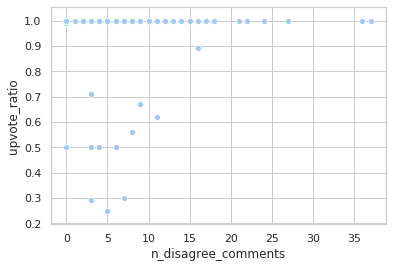

In [77]:
sns.scatterplot(data=posts_df,x='n_disagree_comments',y='upvote_ratio')

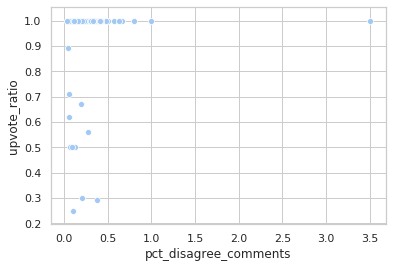

In [78]:
sns.scatterplot(data=posts_df,x='pct_disagree_comments',y='upvote_ratio')

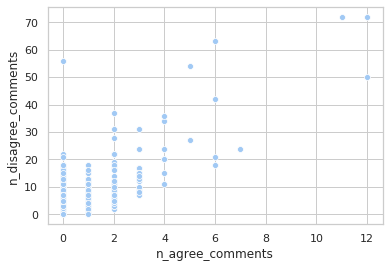

In [79]:
sns.scatterplot(data=posts_df,x='n_agree_comments',y='n_disagree_comments')

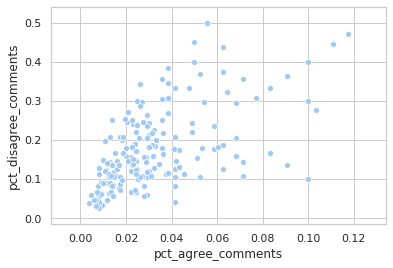

In [80]:
sns.scatterplot(data=posts_df,x='pct_agree_comments',y='pct_disagree_comments')